In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# import dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/titanic.xlsx')
data = df.copy()

# Preliminary

In [ ]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
data.sample(5)

,survived,name,sex,age
260,1,"Shutes, Miss. Elizabeth W",female,40.0
285,0,"Straus, Mr. Isidor",male,67.0
161,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0
289,1,"Taussig, Miss. Ruth",female,18.0
311,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observation:

1. The `survived` and `age` columns are numeric.
2. The `name` and `sex` columns are string (text).
3. The `survived` column is apparently binary (0 or 1).
4. The `sex` column seems to contain two distinct values (male or female).
5. No obvious defects in the data (column names match their entries); everything looks good.
6. The dataset contains 4 columns and 500 rows.
7. Most of the missing values appear in the `age` column; this will be handled later.
8. All data types seem appropriate for their respective columns.

# Data Cleaning

## 1. Duplicate Handling

In [ ]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Display duplicate rows (if any)
print("Duplicate records found:\n", duplicate_rows)


Number of duplicate rows: 1
Duplicate records found:
      survived                            name     sex   age
349         1  Eustis, Miss. Elizabeth Mussey  female  54.0


In [ ]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates:", data_cleaned.shape[0])


Number of rows after removing duplicates: 499


## 2. Missing Value Handling

In [ ]:
# Check for missing values in each column
missing_values = data_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 survived     0
name         0
sex          0
age         49
dtype: int64


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)



Percentage of missing values per column:
 survived    0.000000
name        0.000000
sex         0.000000
age         9.819639
dtype: float64


In [ ]:
# Handling missing values (below 20%)
for column in data_cleaned.columns:
    if missing_percentage[column] > 0 and missing_percentage[column] < 20:
        if data_cleaned[column].dtype == 'object':
            # If column is categorical, fill missing values with the mode
            data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)
        else:
            # If column is numerical, fill missing values with the median
            data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)


<ipython-input-34-65f57c90c9ba>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)
<ipython-input-34-65f57c90c9ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)


In [ ]:
# Re-check for any remaining missing values
print("\nMissing values after handling:\n", data_cleaned.isnull().sum())


Missing values after handling:
 survived    0
name        0
sex         0
age         0
dtype: int64


In [ ]:
# Display cleaned dataset (tail)
print("\nCleaned Dataset Preview:")
print(data_cleaned.tail())


Cleaned Dataset Preview:
     survived                                     name     sex   age
495         1  Mallet, Mrs. Albert (Antoinette Magnin)  female  24.0
496         0        Mangiavacchi, Mr. Serafino Emilio    male  35.0
497         0               Matthews, Mr. William John    male  30.0
498         0                Maybery, Mr. Frank Hubert    male  40.0
499         0                McCrae, Mr. Arthur Gordon    male  32.0


# Statistical Summary

In [ ]:
data_cleaned.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
# group column names based on type
categoricals = ['name', 'sex']
numericals = ['survived', 'age']

In [ ]:
# Syntax categorical statistical summary
data_cleaned[categoricals].describe()

,name,sex
count,499,499
unique,499,2
top,"McCrae, Mr. Arthur Gordon",male
freq,1,288


Observation:

1. The `name` column contains 499 entries, with 499 unique values
2. The `sex` column also has 499 entries, but only 2 unique categories (male and female), which is expected for gender data.
4. The most common category in the sex column is male with a total frequency of 288.

In [ ]:
# Syntax numerical statistical summary
data_cleaned[numericals].describe()

,survived,age
count,499.000000,499.000000
mean,0.539078,35.791416
std,0.498971,14.015770
min,0.000000,0.666700
25%,0.000000,25.500000
50%,1.000000,35.000000
75%,1.000000,45.000000
max,1.000000,80.000000


Observation:

1. Overall, the minimum and maximum values make sense for each column.
2. The age column has a reasonable range (min = 0.6667, max = 80.0). The median (35.0) is quite close to the mean (35.79), suggesting the age distribution is likely close to symmetrical but may have some slight skew due to outliers at the lower end (age 0.6667).
3. The age spread (standard deviation 14.02) shows a fairly wide range, which is typical for demographic data like age.

<ipython-input-41-4024beb7cca0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='survived', data=data_cleaned, palette='Set2', ax=axes[0])


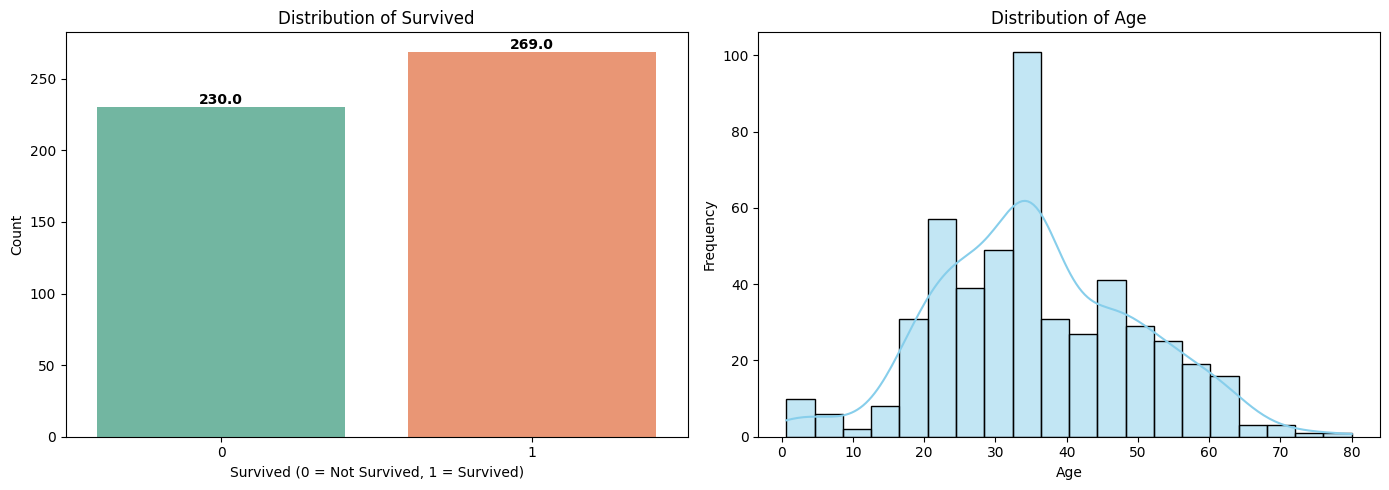

In [ ]:
# Create a figure with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot 1: Distribution of 'survived' column using countplot
ax1 = sns.countplot(x='survived', data=data_cleaned, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Survived')
axes[0].set_xlabel('Survived (0 = Not Survived, 1 = Survived)')
axes[0].set_ylabel('Count')

# Add count labels on top of each bar
for p in ax1.patches:
    count = p.get_height()
    ax1.annotate(f'{count}', (p.get_x() + p.get_width() / 2, count),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Distribution of 'age' column using histogram with KDE (Kernel Density Estimation)
sns.histplot(data_cleaned['age'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust the layout so plots don't overlap
plt.tight_layout()
plt.show()

Observation:

The bar chart shows the distribution of the survived column.
- A total of 269 passengers survived (label 1).
- A total of 230 passengers did not survive (label 0).

The histogram shows the distribution of Age among passengers.
- The majority of passengers are between 20 to 40 years old, with the peak around the 25–35 age range.
- The distribution is right-skewed, meaning there are more younger passengers compared to older ones.
- Very few passengers were above 70 years old or below 5 years old.
- The smooth blue curve (KDE plot) shows the overall age trend, which confirms the central concentration in the young adult group.

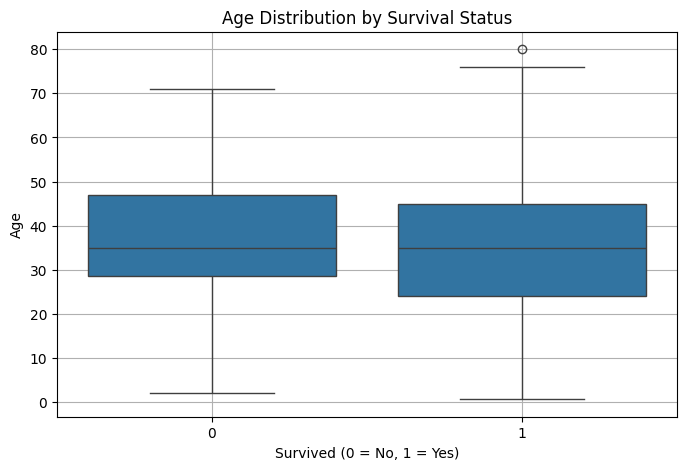

In [ ]:
# Boxplot: age distribution by survival status
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=data_cleaned)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Correlation Between Age and Survival

Boxplot Analysis:
- The median age of passengers who survived (Survived = 1) and those who did not (Survived = 0) is quite similar, around 30–35 years.
- The age range for both groups is wide, from infants up to 80 years old (80 is identified as an outlier in the Survived = 1 group).
- Passengers who survived tend to be slightly younger compared to those who did not survive.
- The presence of an outlier at age 80 shows that although survival is more common among younger passengers, older individuals also had a chance, though rarely.
- Visually, age seems to have some influence on survival, but a statistical test is recommended to confirm the relationship.

In [ ]:
# Correlation Between Age and Survival
from scipy.stats import pointbiserialr
corr, p_value = pointbiserialr(data_cleaned['survived'], data_cleaned['age'])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: -0.13939423233698792
P-value: 0.0018007061085229116
